In [56]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Функция ввода изображения

In [73]:
def img_input(img_path, size=(0,0), type=1):
    img = cv.imread(img_path,type)
    if type == 1:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        if size != (0,0):
            img = cv.resize(img, size)
            return img
        else:
            return img
    else:
        if size != (0,0):
            img = cv.resize(img, size)
            return img
        else:
            return img

Функция вывода изображений

In [74]:
def img_print(images, titles, row_and_colm=(0,0), hard_type='None'):
    num_of_img = len(images)
    if hard_type == 'None':
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

    else:
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

Индивидуальное задание, взять изображение с плавным изменением интенсивности, провести различные пошаговые обработки

In [75]:
img = img_input('pic/CatWithShadow.jpg', type=0)

In [76]:
ret, thresh1 = cv.threshold (img, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold (img, 127, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold (img, 127, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold (img, 127, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold (img, 127, 255, cv.THRESH_TOZERO_INV)

In [77]:
title = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
res = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

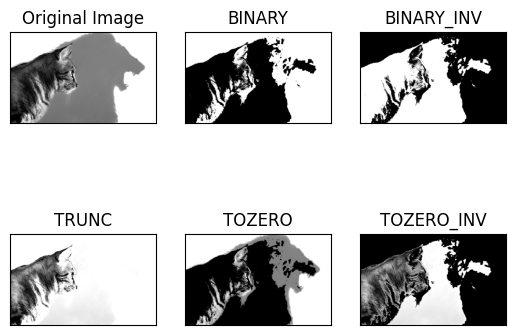

In [78]:
img_print(res,title, row_and_colm=(2,3), hard_type='gray')

Для изображения с резкими переходами, протестировать функцию с адаптивным порогом

In [81]:
img = img_input('pic/avto.jpg', type=0)

In [85]:
ret1,th1 = cv.threshold(img,100,255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

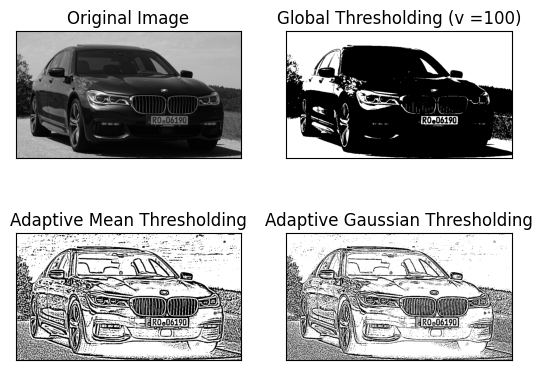

In [87]:
images = [img, th1, th2, th3]
titles = ['Original Image', 'Global Thresholding (v =100)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

img_print(images, titles, row_and_colm=(2,2), hard_type='gray')

Создать шумы на изображении и произвести обработку Оцу на изображении с шумами, и по изображению предварительно обработанному фильтром Гаусса с ядром 5x5

Создадим шумы, для этого импортируем дополнительные библиотеки, и напиши функцию

In [90]:
import random
from PIL import Image, ImageDraw

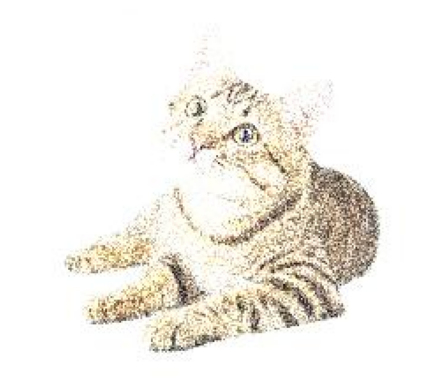

In [97]:
image = Image.open('pic/CatCat.jpg')
draw = ImageDraw.Draw(image)
width = image.size[0]
height = image.size[1]
pix = image.load()
for i in range(width):
    for j in range(height):
        rand = random.randint(0, 150)
        a = pix[i, j][0] + rand
        b = pix[i, j][1] + rand
        c = pix[i, j][2] + rand
        if (a > 255):
            a = 255
        if (b > 255):
            b = 255
        if (c > 255):
            c = 255
        draw.point((i, j), (a, b, c))
image.save("pic/IndMedian.png", "JPEG")

img = cv.imread("pic/IndMedian.png", 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));
plt.axis('off');

Применим обработку Оцу

In [99]:
img = cv.imread("pic/IndMedian.png", 0)
ret2, th2 = cv.threshold(img, 0, 255,cv.THRESH_BINARY+cv.THRESH_OTSU)

Теперь применим фильтр Гаусса с ядром 5x5 и так же произведем обработку Оцу

In [101]:
blur = cv.GaussianBlur(img,(5,5),0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

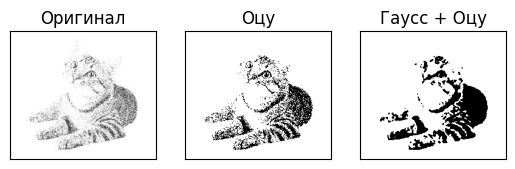

In [103]:
res = [img, th2, th3]
titles = ['Оригинал', 'Оцу', 'Гаусс + Оцу' ]

img_print(res, titles, hard_type='gray')